In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data =  pd.read_csv('netflix1.csv')

In [3]:
data

,TV,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TV            8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
print("Number of Columns: ", data.shape[1])
print("Number of Rows: ",data.shape[0])

Number of Columns:  10
Number of Rows:  8790


# Checking for NULL Value

In [6]:
print(data.isnull().sum())

TV              0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


# Check any Duplicate colummn are present or NOT..

In [7]:
print("Number of Duplicate Entries: ", data.duplicated().sum())

Number of Duplicate Entries:  0


# Change Column DATATYPE 

In [8]:
data['date_added'] = pd.to_datetime(data['date_added'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TV            8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [9]:
data['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

# Top 10 Countries by Frequency 

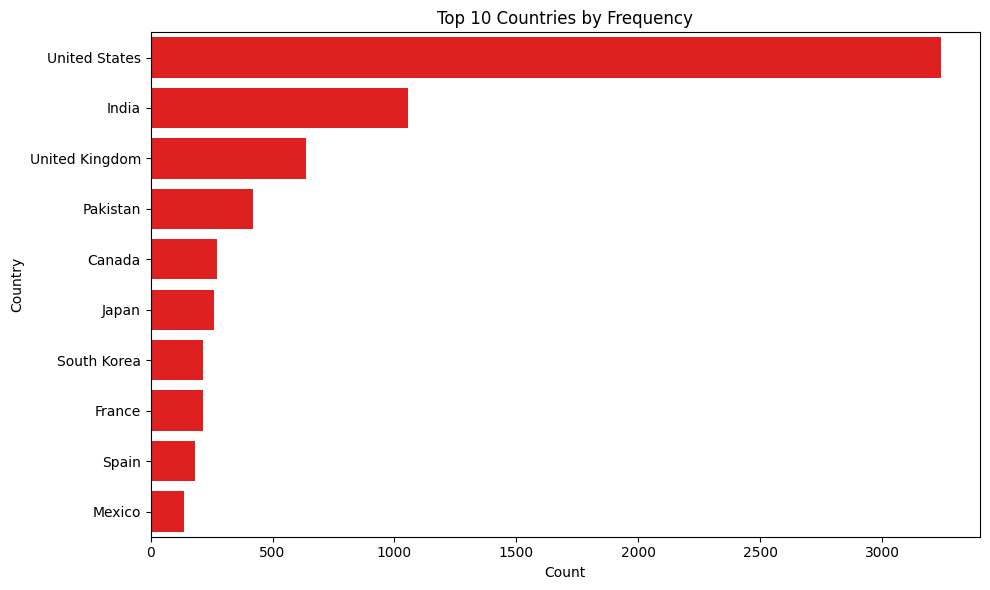

In [10]:
filtered_data = data[data['country'] != 'Not Given']
top_countries = filtered_data['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries.index, x=top_countries.values, orient='h', color= 'red')
plt.title('Top 10 Countries by Frequency')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [11]:
data.columns

Index(['TV', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# Rating Count 

In [12]:
ratings_count = data['rating'].value_counts()
print(ratings_count)

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


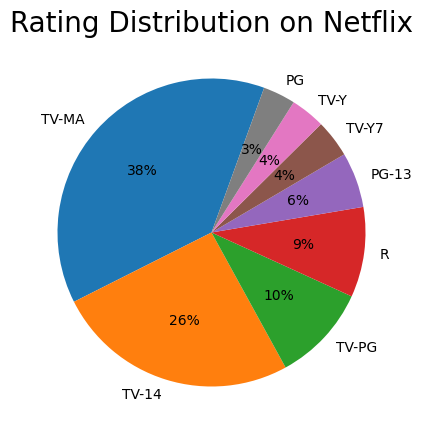

In [13]:
plt.figure(figsize=(5,5))
plt.pie(ratings_count[:8], labels=ratings_count.index[:8],autopct='%.0f%%',startangle=70)
plt.title('Rating Distribution on Netflix', fontsize=20)
plt.show()

# Top 5 Directors

In [14]:

data['director'] = data['director'].fillna('Director not specified')
director_counts = data['director'].value_counts()
top_5_directors = director_counts[~director_counts.index.isin(['Director not specified', 'Not Given'])].head(5)
top_5_directors_df = top_5_directors.reset_index()
top_5_directors_df.columns = ['Director', 'Count']
top_5_directors_df.set_index('Director', inplace=True ) 
print(top_5_directors_df.to_string(index=True))


                        Count
Director                     
Rajiv Chilaka              20
Alastair Fothergill        18
Raúl Campos, Jan Suter     18
Suhas Kadav                16
Marcus Raboy               16


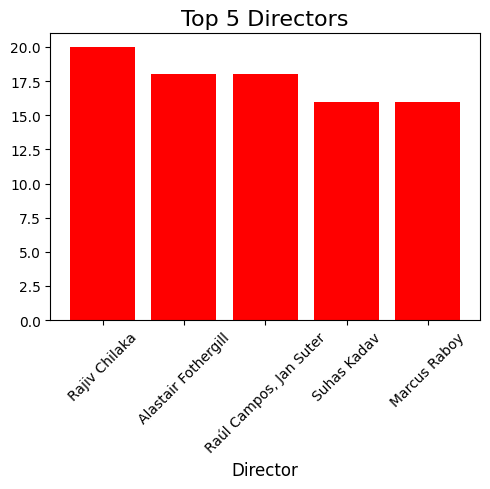

In [15]:
plt.figure(figsize=(5,5))
plt.bar(top_5_directors.index, top_5_directors.values, color='red')
plt.title('Top 5 Directors', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.show()

# Yearly releases of Movies and TV Shows on Netflix

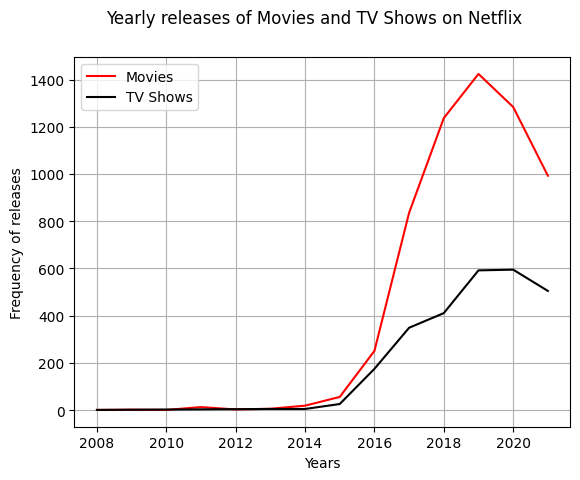

In [16]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day
yearly_movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index,yearly_movie_releases.values, label='Movies', color= 'red')
plt.plot(yearly_series_releases.index,yearly_series_releases.values, label='TV Shows', color= 'black')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

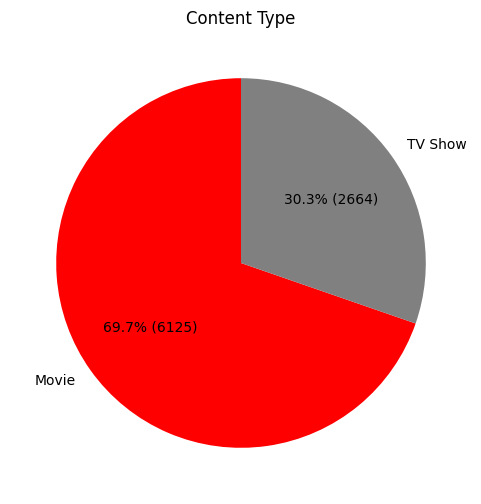

In [17]:
freq = data['type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(freq, labels=freq.index, autopct=lambda p: f'{p:.1f}% ({int(p * sum(freq) / 100)})', startangle=90, colors = ['red','grey'])
plt.title('Content Type')
plt.show()